In [1]:
import geopandas as gpd
import pandas as pd

In [5]:
# Haal de kaart met gemeentegrenzen op van PDOK
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2022_gegeneraliseerd&outputFormat=json'
df_gemeentegrenzen_raw = gpd.read_file(geodata_url)
df_gemeentegrenzen_raw.head(2)

,id,statcode,statnaam,jrstatcode,rubriek,geometry
0,cbs_gemeente_2022_gegeneraliseerd.1,GM0014,Groningen,2022GM0014,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344...."
1,cbs_gemeente_2022_gegeneraliseerd.2,GM0034,Almere,2022GM0034,gemeente,"MULTIPOLYGON (((146891.056 493291.709, 147422...."


<AxesSubplot:>

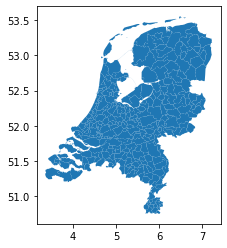

In [8]:
df_gemeentegrenzen_raw.crs
df_gemeentegrenzen = df_gemeentegrenzen_raw[['statcode', 'geometry']].set_index('statcode').to_crs("epsg:4326")
df_gemeentegrenzen.head(2)
df_gemeentegrenzen.plot()

In [9]:
# df_zkhregios = pd.read_excel('Gebieden_in_Nederland_2022_20062022_134532.xlsx')
df_zkhregios = pd.read_excel('zkh_regios.xlsx')
df_zkhregios = df_zkhregios.set_index('Codes en namen van gemeenten/Code (code)')
df_zkhregios.index = df_zkhregios.index.str.strip()
df_zkhregios.head(2)

,Regio's,Codes en namen van gemeenten/Naam (naam),Lokaliseringen van gemeenten/COROP-gebieden/Code (code),Lokaliseringen van gemeenten/COROP-gebieden/Naam (naam),Lokaliseringen van gemeenten/GGD-regio's/Code (code),Lokaliseringen van gemeenten/GGD-regio's/Naam (naam),Lokaliseringen van gemeenten/Jeugdregio's/Code (code),Lokaliseringen van gemeenten/Jeugdregio's/Naam (naam),Lokaliseringen van gemeenten/Provincies/Code (code),Lokaliseringen van gemeenten/Provincies/Naam (naam),...,Lokaliseringen van gemeenten/Toeristengebieden/Code (code),Lokaliseringen van gemeenten/Toeristengebieden/Naam (naam),Lokaliseringen van gemeenten/Veiligheidsregio's/Code (code),Lokaliseringen van gemeenten/Veiligheidsregio's/Naam (naam),Lokaliseringen van gemeenten/Zorgkantoorregio's/Code (code),Lokaliseringen van gemeenten/Zorgkantoorregio's/Naam (naam),Lokaliseringen van gemeenten/ROAZregio's/Code (code),Lokaliseringen van gemeenten/ROAZregio's/Naam (naam),Lokaliseringen van gemeenten/RAVregio's/Code (code),Lokaliseringen van gemeenten/RAVregio's/Naam (naam)
Codes en namen van gemeenten/Code (code),,,,,,,,,,,,,,,,,,,,,
GM1680,Aa en Hunze,Aa en Hunze ...,CR07,Noord-Drenthe ...,GG0706,GGD Drenthe ...,JZ04,Drenthe ...,PV22,Drenthe ...,...,TR12,"Groningse, Friese en Drentse Zandgronden ...",VR03,Drenthe ...,ZK06,Drenthe ...,ROAZ01,Acute Zorg Noord Nederland,VR03,Drenthe ...
GM0358,Aalsmeer,Aalsmeer ...,CR23,Groot-Amsterdam ...,GG3406,GGD Amsterdam ...,JZ13,Amsterdam-Amstelland ...,PV27,Noord-Holland ...,...,TR06,Hollands-Utrechtse meren ...,VR13,Amsterdam-Amstelland ...,ZK01,Amstelland en De Meerlanden ...,ROAZ02,Netwerk Acute Zorg Noordwest,VR13,Amsterdam-Amstelland ...


In [10]:
df_gemeentegrenzen.shape, df_zkhregios.shape

((345, 1), (345, 22))

In [11]:
gdf_regios = df_gemeentegrenzen.join(df_zkhregios, how='inner')

In [24]:
# gdf_regios["Lokaliseringen van gemeenten/ROAZregio's/Code (code)"].loc[ gdf_regios["Lokaliseringen van gemeenten/ROAZregio's/Code (code)"] == 'ROAZ06'] = 'ROAZ05'
# gdf_regios.head(2)

c:\Users\schaekente\Miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,geometry,Regio's,Codes en namen van gemeenten/Naam (naam),Lokaliseringen van gemeenten/COROP-gebieden/Code (code),Lokaliseringen van gemeenten/COROP-gebieden/Naam (naam),Lokaliseringen van gemeenten/GGD-regio's/Code (code),Lokaliseringen van gemeenten/GGD-regio's/Naam (naam),Lokaliseringen van gemeenten/Jeugdregio's/Code (code),Lokaliseringen van gemeenten/Jeugdregio's/Naam (naam),Lokaliseringen van gemeenten/Provincies/Code (code),...,Lokaliseringen van gemeenten/Toeristengebieden/Code (code),Lokaliseringen van gemeenten/Toeristengebieden/Naam (naam),Lokaliseringen van gemeenten/Veiligheidsregio's/Code (code),Lokaliseringen van gemeenten/Veiligheidsregio's/Naam (naam),Lokaliseringen van gemeenten/Zorgkantoorregio's/Code (code),Lokaliseringen van gemeenten/Zorgkantoorregio's/Naam (naam),Lokaliseringen van gemeenten/ROAZregio's/Code (code),Lokaliseringen van gemeenten/ROAZregio's/Naam (naam),Lokaliseringen van gemeenten/RAVregio's/Code (code),Lokaliseringen van gemeenten/RAVregio's/Naam (naam)
GM0014,"MULTIPOLYGON (((6.74047 53.31218, 6.74268 53.3...",Groningen (gemeente),Groningen ...,CR03,Overig Groningen ...,GG0111,GGD Groningen ...,JZ01,Groningen ...,PV20,...,TR17,Overig Nederland ...,VR01,Groningen ...,ZK09,Groningen ...,ROAZ01,Acute Zorg Noord Nederland,VR01,Groningen ...
GM0034,"MULTIPOLYGON (((5.26798 52.42737, 5.27581 52.4...",Almere,Almere ...,CR40,Flevoland ...,GG2209,GGD Flevoland ...,JZ08,Flevoland ...,PV24,...,TR03,IJsselmeerkust ...,VR25,Flevoland ...,ZK21,'t Gooi ...,ROAZ05,SpoedzorgNet,VR25,Flevoland ...


27
27


C:\Users\schaekente\AppData\Local\Temp\ipykernel_43132\4172456720.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['code'][gdf['code'] == "ROAZ02"] = "ROAZ05"


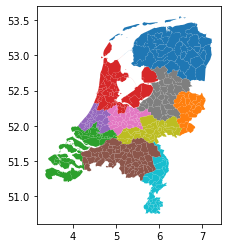

In [27]:
names = {
    # 'corop': "Lokaliseringen van gemeenten/COROP-gebieden/Code (code)",
    # 'ggd': "Lokaliseringen van gemeenten/GGD-regio's/Code (code)",
    # 'jeugd': "Lokaliseringen van gemeenten/Jeugdregio's/Code (code)",
    # 'provincie': "Lokaliseringen van gemeenten/Provincies/Code (code)",
    # 'energie': "Lokaliseringen van gemeenten/Regionale Energiestrategie regio’s/Code (code)",
    # 'veiligheid': "Lokaliseringen van gemeenten/Veiligheidsregio's/Code (code)",
    # 'zorgkantoor': "Lokaliseringen van gemeenten/Zorgkantoorregio's/Code (code)",
    # 'rav': "Lokaliseringen van gemeenten/RAVregio's/Code (code)"
    'roaz': "Lokaliseringen van gemeenten/ROAZregio's/Code (code)",
}

for regio_name, regio_col in names.items():
    gdf = gpd.GeoDataFrame(gdf_regios[[regio_col, "geometry"]].reset_index(drop=True))
    gdf = gdf.rename(columns={regio_col: 'code'})
    gdf['code'] = gdf['code'].str.strip()
    if regio_name == "roaz":
        # not agreeing with:
        # https://skr-zorg.nl/wp-content/uploads/ROAZ-Methodologie-1-256x300.png
        print( (gdf['code'] == "ROAZ06").sum() )
        gdf['code'][gdf['code'] == "ROAZ02"] = "ROAZ05"
        print( (gdf['code'] == "ROAZ06").sum() )
    gdf.plot(column='code')
    gdf = gdf.dissolve(by='code')
    
    gdf.to_file(f'regios/{regio_name}.json', driver="GeoJSON")
